WEEKLY QUIZ WEEK4 위클리퀴즈 4주차입니다.

좌측상단에 파일->Drive에 사본저장->구글 드라이브에 있는 사본으로 문제푸신후 실행 제출부탁드립니다.

제출시 상단의 노트제목은 "week3_이름"으로 변경하시고 우측상단에 공유 눌러서 링크복사 후에 링크올리시면됩니다.
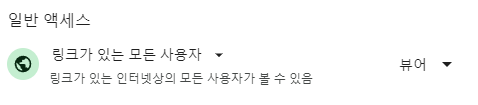

금일 11시 59분까지 제출해주세요

1.다음 조건에 맞게 출력해주세요

    scikit-learn 라이브러리를 사용하여 붓꽃(Iris) 데이터셋을 불러오기
    데이터셋을 학습용과 테스트용으로 나누기(테스트데이터셋 20%)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X = iris["data"]
y = iris["target"]
x_train,x_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=y)

print("x_train: ", x_train.shape)
print("x_test : ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test : ", y_test.shape)

x_train:  (120, 4)
x_test :  (30, 4)
y_train:  (120,)
y_test :  (30,)


2,다음 조건에 맞게 출력해주세요

    문제 1에서 만든 학습데이터를 사용하여 랜덤포레스트 분류기를 학습
    테스트데이터로 모델의 정확도를 평가 출력

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC = RFC.predict(x_test)

print("랜덤 포레스트 분류기에 대한 iris 데이터의 정확도는 :",accuracy_score(pred_RFC, y_test))

랜덤 포레스트 분류기에 대한 iris 데이터의 정확도는 : 0.9


3.다음 조건에 맞게 출력해주세요

    GridSearchCV를 사용하여 랜덤포레스트의 하이퍼파라미터 튜닝을 수행
    튜닝할 하이퍼파라미터는 n_estimators (10, 50, 100), max_depth (None, 10, 20)

    

In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search(params,model_base = RandomForestClassifier(random_state=42)):
    model_base = GridSearchCV(RFC,
                              params,
                              cv = 5,
                              return_train_score=True,
                              n_jobs = -1)

    model_base.fit(x_train, y_train)
    return model_base

params = {"n_estimators" : [10, 50, 100],
          "max_depth" : [None, 10, 20]}

grid_model = grid_search(params)

In [ ]:
grid_model.best_score_

0.9583333333333334

4.다음조건에 맞게 출력해주세요

    문제 3에서 최적의 하이퍼파라미터로 학습된 모델을 사용하여 각 특성(feature)의 중요도 계산
    특성 중요도를 시각화


In [ ]:
grid_model.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=10)

In [ ]:
best_model = grid_model.best_estimator_
# 각 피쳐의 중요도

for feature, importance in zip(iris["feature_names"], \
                               best_model.feature_importances_):
  print(f"{feature} 의 중요도는 {importance * 100:0.2f} %")


sepal length (cm) 의 중요도는 22.38 %
sepal width (cm) 의 중요도는 3.62 %
petal length (cm) 의 중요도는 38.42 %
petal width (cm) 의 중요도는 35.58 %


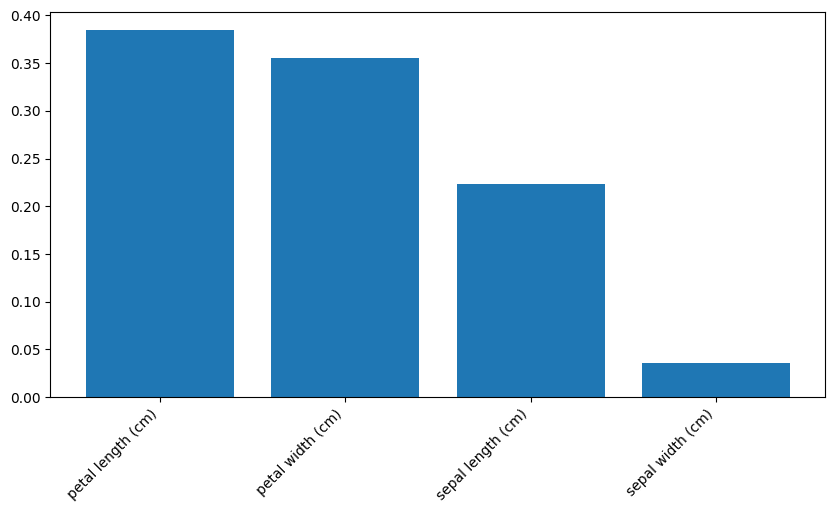

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



importances = {}
for i in range(len(iris["feature_names"])):
    importances[iris["feature_names"][i]] = best_model.feature_importances_[i]

sorted_keys = sorted(importances, key=importances.get ,reverse=True)
sorted_values = [importances[key] for key in sorted_keys]

fig, ax = plt.subplots(1,1,figsize = (10,5))

ax.bar(sorted_keys, sorted_values)
plt.setp(ax.get_xticklabels(), ha = "right", rotation = 45);